# 泊松分布

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import power
from scipy.special import comb

## 1 相关知识


### 1.1 Bernoulli Experiment (伯努利试验)
对于一个试验（事件），如果重复发生的概率是独立的（互补影响），那么它是独立试验。特别的，如果这个试验只存在**两种结果**，则称其为伯努利试验。


### 1.2 Binomial Distribution (二项式分布)
对于重复$n$次的伯努利试验，我们可以计算成功$k$次的概率：

$P_{k}=C_{n}^{k} p^{k}(1-p)^{n-k}=\frac{n !}{(n-k) ! k !} \cdot p^{k}(1-p)^{n-k}$

In [2]:
def BinomialDist(n, k, p=.5):
    return comb(n, k) * power(p, k) * power(1-p, n-k)

**e.g.** 假设我们抛一枚硬币，总共抛10次，求10次都是正面的概率？

解：$P_{10} = 0.5^{10}$

验证一下我们的函数：

In [3]:
BinomialDist(10, 10) == power(0.5, 10)

True

**e.g.** 假设我们抛一枚硬币，总共抛10次，分别求$k=0,1,2,...,10$次是正面的概率？

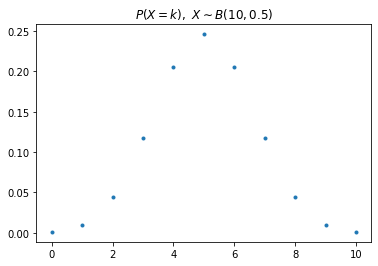

In [4]:
ks = np.linspace(0, 10, 11) #ks=0,1,2,...,10

Plst = BinomialDist(10, ks)
plt.plot(Plst, '.')
plt.title(r'$P(X=k),\ X \sim B(10,0.5)$')
plt.show()

从上图可以看出，$k=5$时候最大，这符合我们的预期：抛10次硬币，正面朝上的次数最有可能为5。即随机变量$\xi \sim B(10, 0.5)$，$E(\xi)=np=5$。

简单证明一下$E(\xi)=np$：

1. 预备公式：$k c_{n}^{k}=n c_{n-1}^{k-1}$

2. 离散型随机变量$\xi$的期望：$E(\xi)=\sum_i^n(x_i\cdot p(x_i))$

3. 这里$x_i = k = 0,1,...,n$，而$p(x_i)=p(k)=C_{n}^{k} p^{k}(1-p)^{n-k}$

$$\begin{aligned}E(\xi) &= 0 \times c_{n}^{0} p^{0} q^{n}+1 \times c_{n}^{1} p^{1} q^{n-1}+ 2 \times c_{n}^{2} p^{2} q^{n-2}\ldots+n c_{n}^{n} p^{0} q^{n}\\
&= n p\left(c_{n-1}^{0} p^{0} q^{n-1}+c_{n-1}^{1} p^{0} q^{n-2}+c_{n-1}^{2} p^{0} q^{n-2} \ldots+c_{n-1}^{n-1} p^{n-1} q^{0}\right)\\
&= n p(p+q)^{n-1}\\
&= n p\end{aligned}$$

计算一下$E(\xi)=\sum_i^n(x_i\cdot p(x_i))$，`ks`相当于$x_i$，`Plst`相当于$p(x_i)$

In [5]:
print('mean =', (ks*Plst).sum())
print('mean =', 10*0.5)

mean = 5.0
mean = 5.0


其他证明方法和方差（$D(\xi)=npq$）可以参考[二项分布的期望和方差的详细证明](https://wenku.baidu.com/view/7038047d31126edb6f1a107a.html)。

$$\begin{array}{l}
D(X)=E\left(X^{2}\right)-E^{2}(X)=\sum_{k=0}^{\infty} k^{2} \cdot \frac{\lambda^{k}}{k !} e^{-\lambda}-\lambda^{2} \\
=\lambda e^{-\lambda} \sum_{k=1}^{\infty} \frac{k \lambda^{k-1}}{(k-1) !}-\lambda^{2}=\lambda e^{-\lambda}\left[\sum_{k=2}^{\infty} \frac{\lambda^{k-1}}{(k-2) !}+\sum_{k=1}^{\infty} \frac{\lambda^{k-1}}{(k-1) !}\right]-\lambda^{2} \\
=\lambda e^{-\lambda}\left[\lambda e^{\lambda}+e^{\lambda}\right]-\lambda^{2}=\lambda
\end{array}$$


总结，如果**随机变量$X=k$的概率**满足$P(X=k)=C_{n}^{k} p^{k}(1-p)^{n-k}$二项式分布，则$X \sim B(n,p)$。

## 2 定义

二项式分布$P\left(k\right)=\frac{n !}{(n-k) ! k !} \cdot p^{k}(1-p)^{n-k}$要求$n$必须为已知数，但是生活中很多事情是没法统计出或者不存在精确的总数，这些事情往往是在一段连续的时间内出现一定的次数，相互之间没有影响（随机发生），并且单次事件耗时和概率几乎可以忽略（只有出现或者未出现，类似二项式分布；任意时刻发生的概率几乎为0）。例如，[某个医院一天/一小时/一周内来的病人数量](https://www.zhihu.com/question/26441147/answer/128055090)；[某个包子店一天/一小时/一周内卖出的包子数量](https://blog.csdn.net/ccnt_2012/article/details/81114920)，我们能得到只有一段时间内事情**发生的**次数。

由于事情是随机发生的，也就是在统计的一定时间内，任意时刻都有可能发生，所以我们就要对二项式公式改进。假设一个小时内发生了$m$次，如果我们10分钟统计一次，总共统计$n=6$次，我们期待$p=\frac{k}{n}$，也就是$k$次需要分别散落在6个10分钟内，显然$k$次可能出现在一个10分钟内。那么1秒钟统计一次呢？还是不行，因为还是存在1秒钟发生$k$次的可能性。为了保证单位时间内最多只有一次事件发生，泊松分布将$n \rightarrow +\infty$，那么单次事件只能发生在$\frac{1}{n}$时间内。

我们可以统计出一段时间内出现的平均次数$\lambda$，那么可以认为单次事件概率$p=\frac{\lambda}{n}$，于是二项式分布就变成了：

$$\lim _{n \rightarrow \infty} P(X=k) \\
= \lim _{n \rightarrow \infty}\left(\begin{array}{l}n \\ k\end{array}\right) p^{k}(1-p)^{n-k}\\
= \left(\frac{\lambda^{k}}{k !}\right) \exp (-\lambda)\\
= \frac{\lambda^k}{k!}e^{-\lambda}$$

其实$e$的定义就是（参见：[自然常数e的含义](https://www.cnblogs.com/ronnydm/p/6523506.html)）：
$$\lim_{n \rightarrow +\infty}(1+\frac{1}{n})^n$$

而$e^{-\lambda} = \lim_{n \rightarrow +\infty}(1+\frac{-\lambda}{n})^n$。

最终泊松分布定义为：若$X$服从参数为$\lambda$的泊松分布，记为$X\sim \pi(\lambda)$或$X\sim P(\lambda)$。

$$P(X=k)=\frac{e^{-\lambda}}{k !}\lambda^{k}$$

相关性质：
- $E(X) = \lambda$
- $D(X) = \lambda$

### 2.1 PMF与PDF
虽然$n\rightarrow +\infty$，并且公式也可以计算$k>0$的非整数，但是泊松分布还是针对离散型随机变量，所以上述公式又称为泊松分布的PMF（概率质量函数）。
- **PMF**（Probability Mass Function，概率质量函数）: 是对**离散随机变量**的定义。是离散随机变量在各个特定取值的概率。该函数通俗来说，就是对于一个离散型概率事件来说，使用这个函数来求它的各个成功事件结果的概率。

- **PDF**（Probability Density Function，概率密度函数 )：是对**连续性随机变量**的定义。与PMF不同的是，PDF在特定点上的值并不是该点的概率, 连续随机概率事件只能求一段区域内发生事件的概率, 通过对这段区间进行积分来求。通俗来说, 使用这个概率密度函数将想要求概率的区间的临界点（最大值和最小值）带入求积分，就是该区间的概率。

### 2.2 参数lambda

我们来看不同参数$\lambda$的泊松分布情况。注意，由于是离散随机变量，所以我们对$k$只能取$\geq 0$的整数。

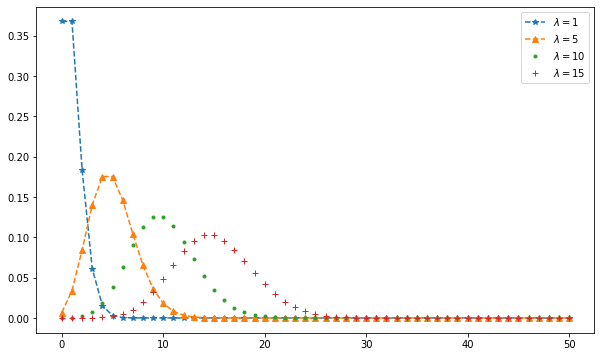

In [6]:
from scipy.special import factorial

Xs = np.linspace(0, 50, 51)

def PD(k, lmd):
    return np.power(lmd, k) * np.exp(-lmd) / factorial(k)

plt.figure(figsize=(10, 6))
plt.plot(Xs, PD(Xs, lmd=1), '*--', label=rf'$\lambda=1$')
plt.plot(Xs, PD(Xs, lmd=5), '^--', label=rf'$\lambda=5$')
plt.plot(Xs, PD(Xs, lmd=10), '.', label=rf'$\lambda=10$')
plt.plot(Xs, PD(Xs, lmd=15), '+', label=rf'$\lambda=15$')

plt.legend()
plt.show()

从上图中，可以看出，泊松分布围绕着$\lambda$为中心的，而且$\lambda$越大，越对称，也越像正态分布。

### 2.3 练习题
**e.g.1** 某餐厅早上15分钟内光临的顾客平均人数为10人，求早上15分钟内光临5人的概率？

解：由题可知$\lambda=10,\ k=5$，则$P(X=5) = \frac{10^5}{5!}e^{-10}$

In [7]:
PD(k=5, lmd=10)

0.03783327480207071

**e.g.2** 继续上题，求这段时间内3分钟内光临5人的概率？

解：由题可推测$\lambda_3=3/15\times \lambda_{15}=2$，则$P_3(X=5)=\frac{2^5}{5!}e^{-2}$

In [8]:
PD(k=5, lmd=2)

0.03608940886309672

## 3 与正态分布的关系
知乎上有个[答案](https://www.zhihu.com/question/21756860/answer/126950765)这样说的：
> 正态分布是所有分布趋于极限大样本的分布，属于连续分布。二项分布与泊松分布，则都是离散分布。二项分布的极限分布是泊松分布，泊松分布的极限分布是正态分布，即$np=\lambda$，当$n$很大时，可以近似相等。当$n$很大时（还没达到连续的程度），可以用泊松分布近似代替二项分布；当n再变大，几乎可以看成连续时，二项分布和泊松分布都可以用正态分布来代替！

乍一看，好像是这么回事，但是仔细想想我们本来就是假设$n \rightarrow +\infty$。从上面的实验中我们发现，$\lambda$越大越接近正态分布。

---
简书上一篇[blog](https://www.jianshu.com/p/62f2402a20cd)认为：当发生次数$k$比较大的时候，泊松分布会变成均值为$\lambda$，方差为$\lambda$的正态分布：

$$\lim _{k \rightarrow \infty} \frac{\lambda^{k}}{k !} e^{-\lambda}=\frac{1}{\sqrt{2 \pi \lambda}} e^{-(x-\lambda)^{2} / 2 \lambda} \sim N(\lambda, \lambda)$$

个人认为这个结论也是明显不对，因为不论参数$\lambda$，$k$都可以$\rightarrow \infty$。不过后半句话应该是对的。

---
根据这篇数学[文章](http://www.math.wm.edu/~leemis/2008amstat.pdf)上的图（截取如下），当$\mu$也就是$\lambda\rightarrow \infty$和$\sigma^{2}=\lambda$时，变成了$N(\mu, \sigma)$：

![](assets/math1.jpg)

这与我们的实验也是相符的。